In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.signal import square

def katsayı_a0(Q, T):
    result, trash_ = quad(lambda Q: square(2 * np.pi * Q / T), 0, T)
    result *= (1 / T)
    return result

def katsayı_Bm(n, Q, T):
    result, trash_ = quad(lambda Q: square(2 * np.pi * Q / T) * np.sin(2 * np.pi * n * Q / T), 0, T)
    result *= (2 / T)
    return result


def katsayı_Am(n, Q, T):
    result, trash_ = quad(lambda Q: square(2 * np.pi * Q / T) * np.cos(2 * np.pi * n * Q / T), 0, T)
    result *= (2 / T)
    return result


def fourier_hesap_func(Q, T, ustel_deger):
    result = np.zeros_like(Q)
    for n in range(1, ustel_deger + 1):
        result += (katsayı_Bm(n, Q, T) * np.sin(2 * np.pi * n * Q / T) + katsayı_Am(n, Q, T) * np.sin(2 * np.pi * n * Q / T))
    return result

def fourier_hesap(periyot = 1, aralık_bas = -np.pi, aralık_son=np.pi, aralık_adet=1000, ustel_deger=1):
    T = periyot  # Periyot
    Q = np.linspace(aralık_bas, aralık_son, aralık_adet)

    kare_dalga = square(2 * np.pi * Q / T)
    fourier_sonucu = fourier_hesap_func(Q, T, ustel_deger)
    fourier_sonucu += katsayı_a0(Q, T)

    if T==1:
        plt.figure(figsize=(10, 6))
        plt.plot(Q, kare_dalga, "k", label='Kare Dalga')
        plt.plot(Q, fourier_sonucu, "b", label=f'Fourier Serisi ({ustel_deger})')
        plt.title(f'Kare Dalga ve Fourier Serisi Yaklaşımı (Üstel Değer: {ustel_deger})')
        plt.xlabel('Zaman')
        plt.ylabel('Genlik')
        plt.legend()
        plt.grid(True)
        plt.savefig("figures/"+str(T)+"_"+str(ustel_deger)+"_"+"fourier.png", dpi=300)
    else:
        plt.figure(figsize=(10, 6))
        plt.plot(Q, kare_dalga, "k", label='Kare Dalga')
        plt.plot(Q, fourier_sonucu, "b", label=f'Fourier Serisi ({ustel_deger})')
        plt.title(f'Kare Dalga ve Fourier Serisi Yaklaşımı (Üstel Değer: {ustel_deger}, Periyot: {T})')
        plt.xlabel('Zaman')
        plt.ylabel('Genlik')
        plt.legend()
        plt.grid(True)
        plt.savefig("figures/"+str(T)+"_"+str(ustel_deger)+"_"+"fourier.png", dpi=300)


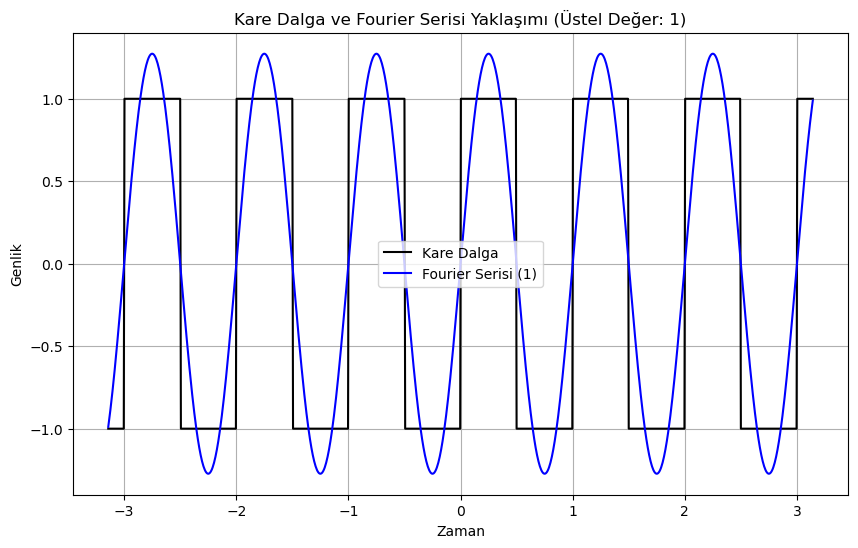

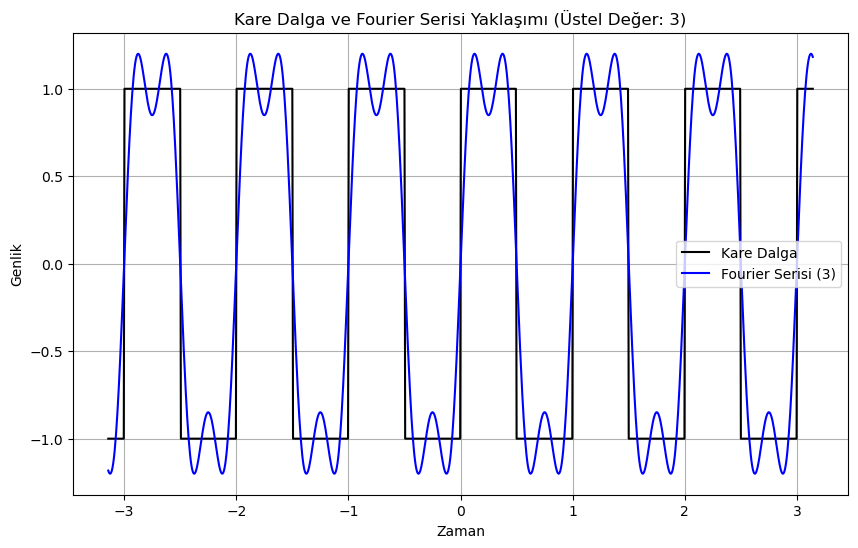

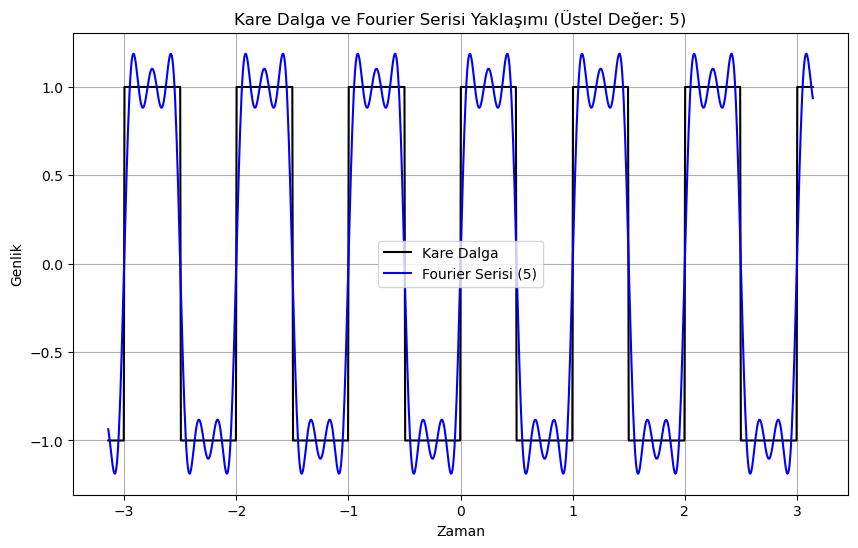

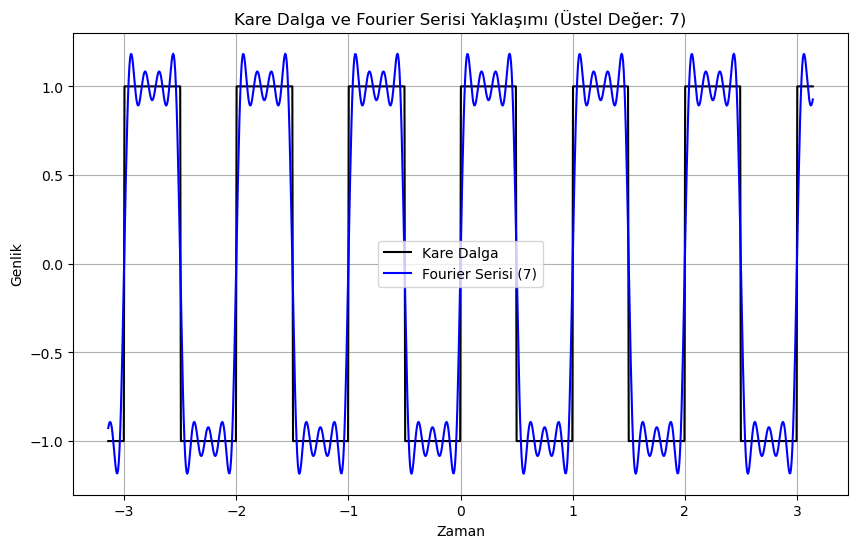

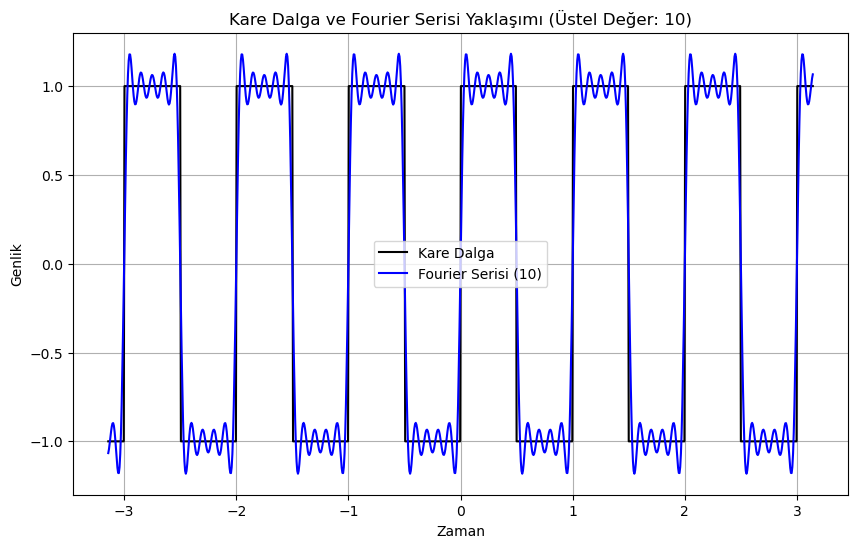

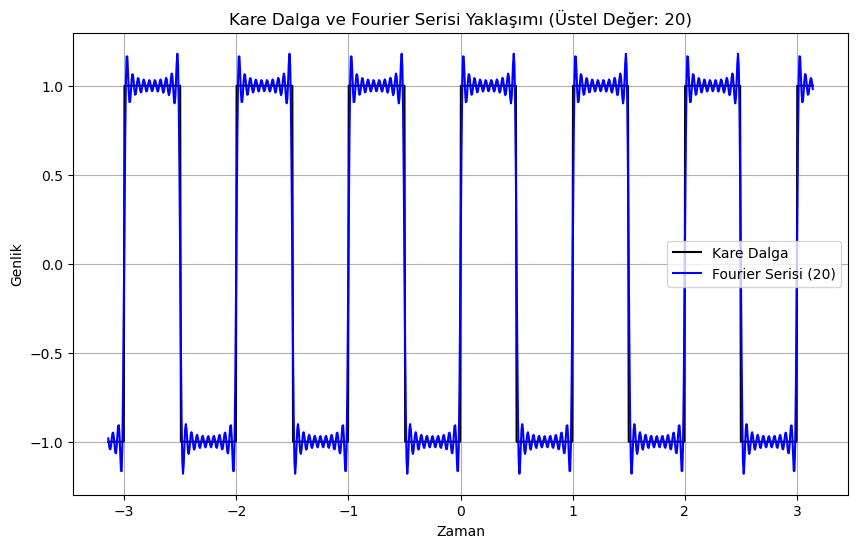

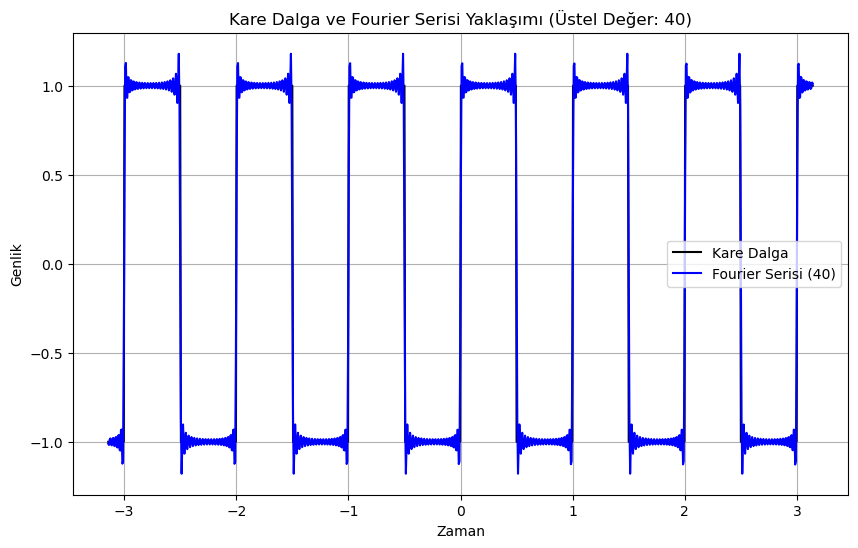

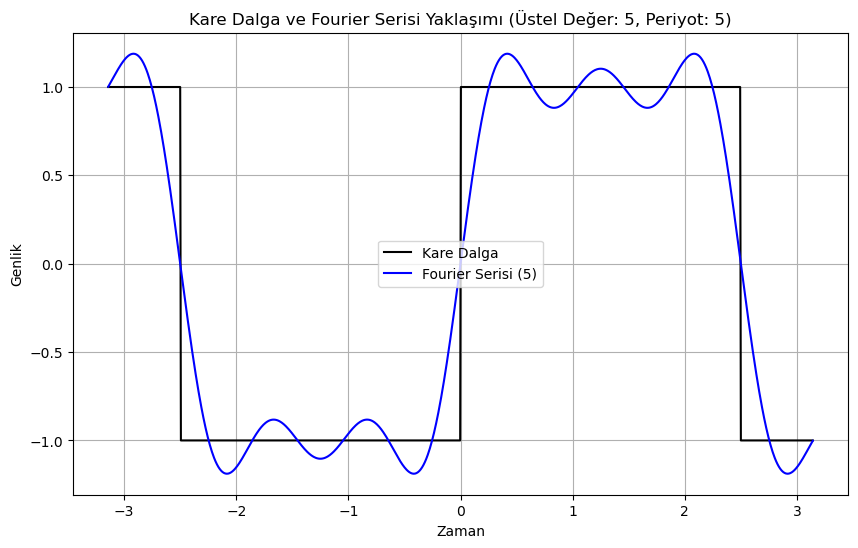

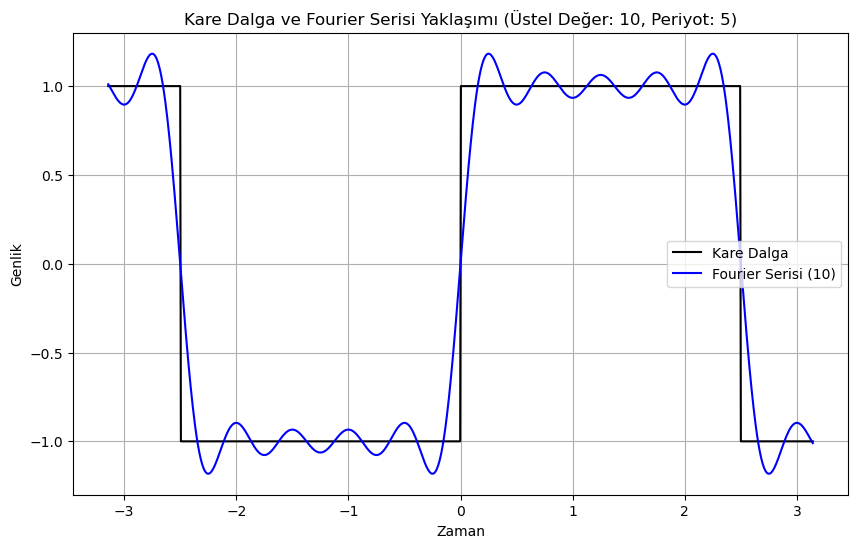

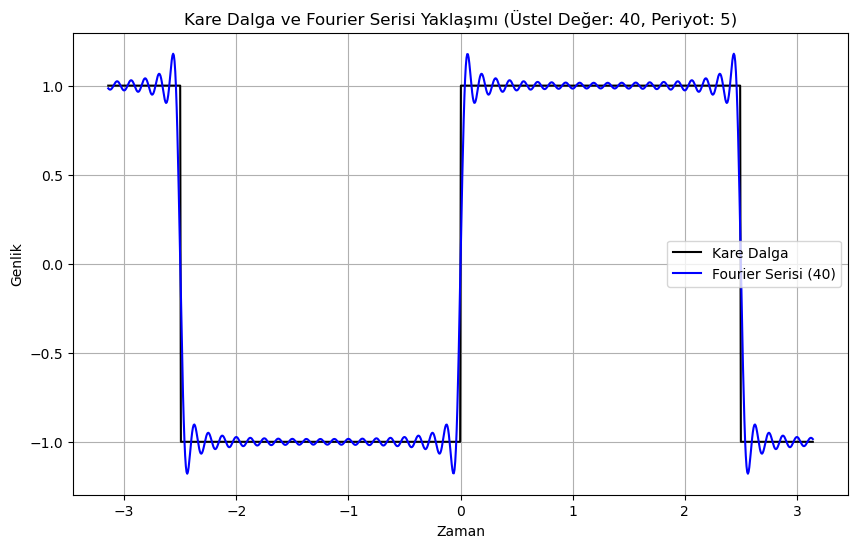

In [2]:
fourier_hesap(ustel_deger=1)
fourier_hesap(ustel_deger=3)
fourier_hesap(ustel_deger=5)
fourier_hesap(ustel_deger=7)
fourier_hesap(ustel_deger=10)
fourier_hesap(ustel_deger=20)
fourier_hesap(ustel_deger=40)
fourier_hesap(periyot=5,ustel_deger=5)
fourier_hesap(periyot=5,ustel_deger=10)
fourier_hesap(periyot=5,ustel_deger=40)